In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('e_commerce.csv', encoding='ISO-8859-1')

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [4]:
#converto la colonna orderdate in datatime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
#ora creo nuove colonne
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['MONTH_NAME'] = df['ORDERDATE'].dt.strftime('%B')
#controllo dei duplicati
num_duplicates = df.duplicated().sum()
print(f'il numero di duplicati è: {num_duplicates}')
print(df[['ORDERDATE','YEAR', 'MONTH', 'MONTH_NAME']].head())

il numero di duplicati è: 0
   ORDERDATE  YEAR  MONTH MONTH_NAME
0 2003-02-24  2003      2   February
1 2003-05-07  2003      5        May
2 2003-07-01  2003      7       July
3 2003-08-25  2003      8     August
4 2003-10-10  2003     10    October


In [8]:
#analisi descrittiva
tot_sales = df['SALES'].sum()
#numero di ordini unici
tot_orders = df['ORDERNUMBER'].nunique()
#numero medio di ordini
average_quantity = df['QUANTITYORDERED'].mean()
#valore medio per ordine
average_order_value = tot_sales/tot_orders
print(f"fatturato totale: {tot_sales:,.2f}")
print(f"numero ordini: {tot_orders}")
print(f"quantità media ordinata: {average_quantity:,.2f}")
print(f"valore medio per ordine: {average_order_value:,.2f}")

fatturato totale: 10,032,628.85
numero ordini: 307
quantità media ordinata: 35.09
valore medio per ordine: 32,679.57


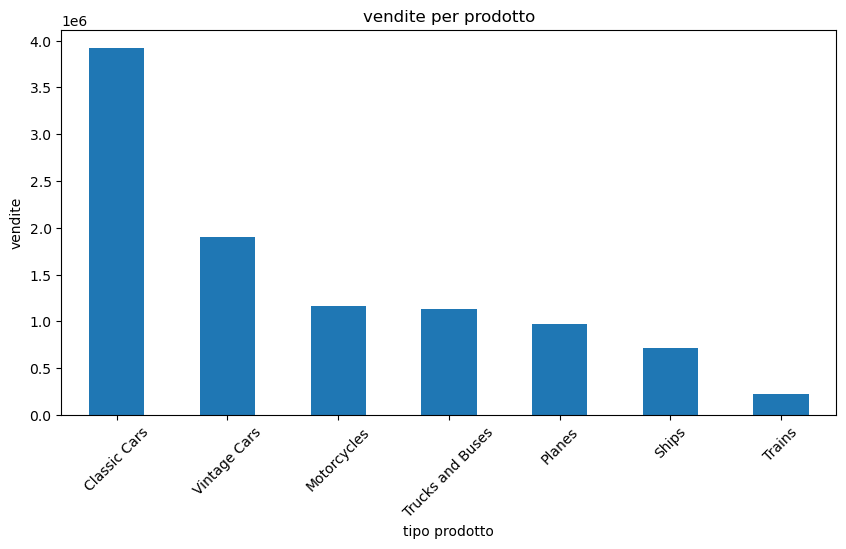

In [2]:
#vendita per categorie
category_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
#bar plot
plt.figure(figsize=(10,5))
category_sales.plot(kind='bar')
plt.title("vendite per prodotto")
plt.xlabel('tipo prodotto')
plt.ylabel('vendite')
plt.xticks(rotation=45)
plt.show()

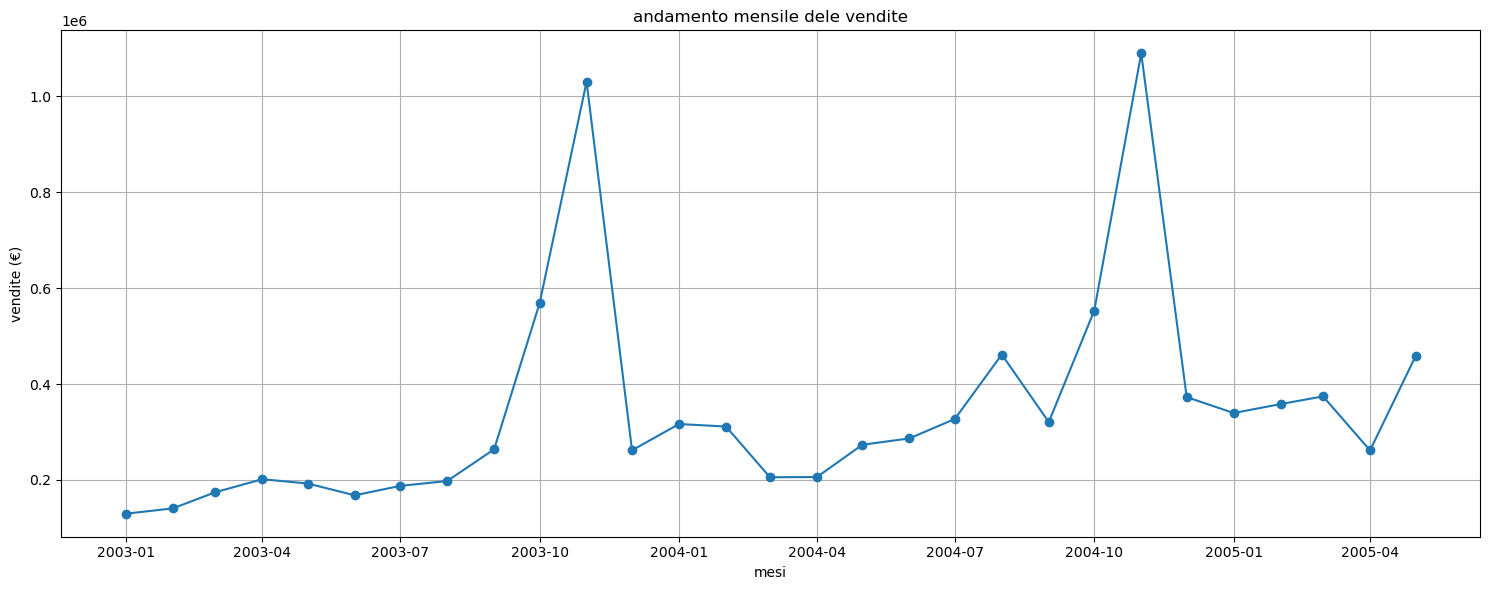

In [6]:
#grafico andamento mensile
monthly_sales = df.groupby(['YEAR', 'MONTH'])['SALES'].sum().reset_index()
monthly_sales['DATE'] = pd.to_datetime(monthly_sales[['YEAR', 'MONTH']].assign(DAY=1))
plt.figure(figsize=(15,6))
plt.plot(monthly_sales['DATE'], monthly_sales['SALES'], marker='o')
plt.title("andamento mensile dele vendite")
plt.xlabel('mesi')
plt.ylabel('vendite (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

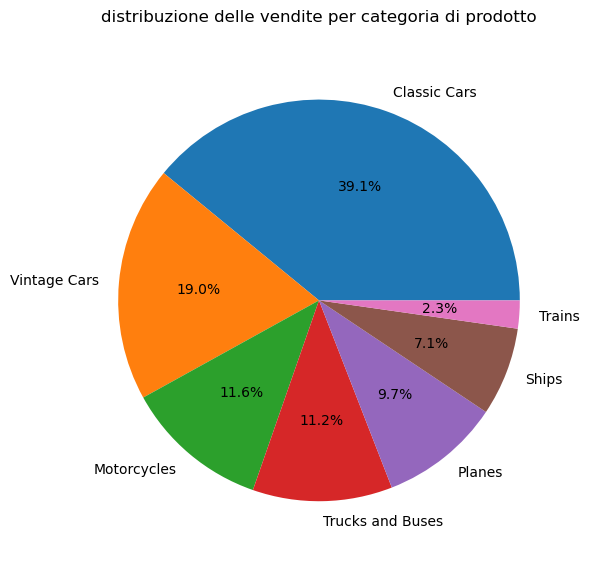

In [10]:
#distribuzione vendite per categorie
category_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,6))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('distribuzione delle vendite per categoria di prodotto')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

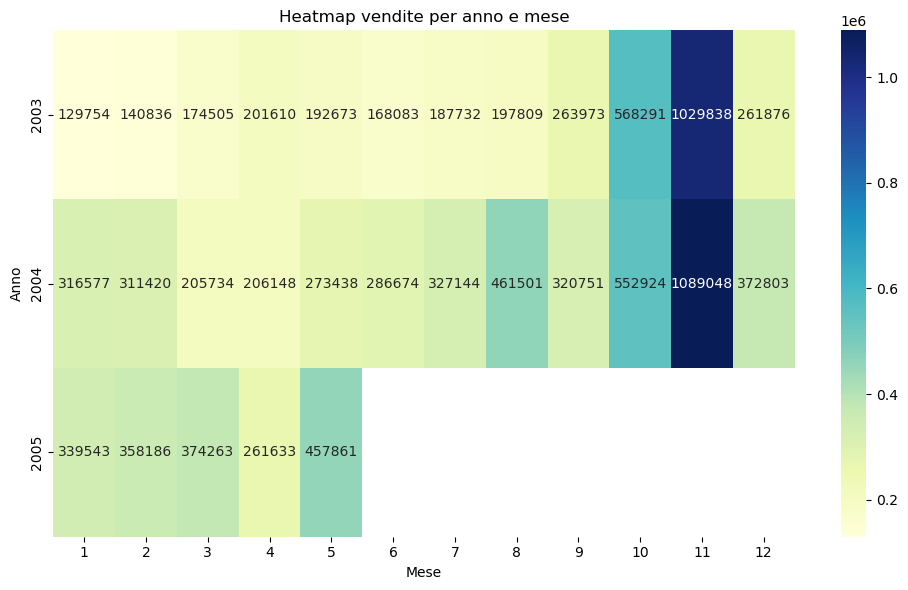

In [11]:
import seaborn as sns
pivot_table = df.pivot_table(values='SALES', index='YEAR', columns='MONTH', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Heatmap vendite per anno e mese')
plt.xlabel('Mese')
plt.ylabel('Anno')
plt.tight_layout()
plt.show()

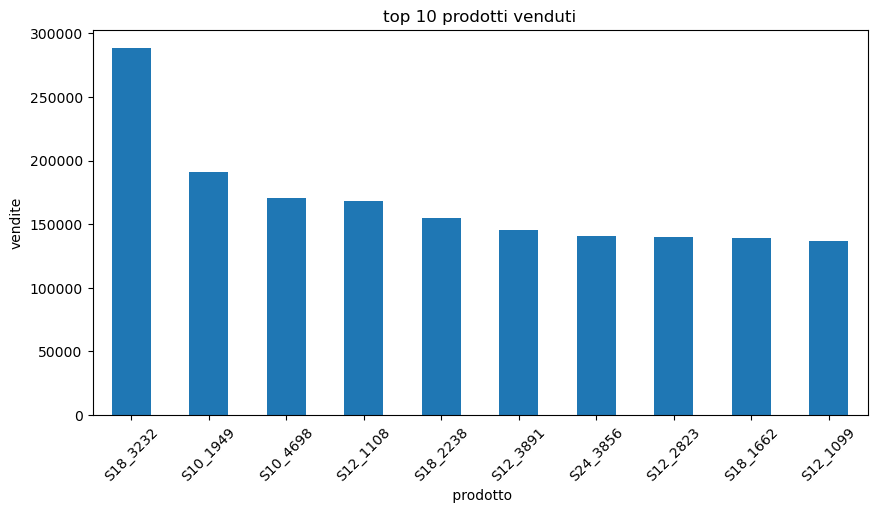

In [3]:
#top 10 prodotti venduti
top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False).head(10)
#bar plot
plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title("top 10 prodotti venduti")
plt.xlabel(' prodotto')
plt.ylabel('vendite')
plt.xticks(rotation=45)
plt.show()